In [1]:
import pandas as pd
weather_df = pd.read_csv('weatherHistory.csv')

In [2]:
from sklearn.model_selection import train_test_split        #to divide the data, part for training and part testing
from sklearn.preprocessing import LabelEncoder              #to Convert categorical columns to numerical

In [3]:
print(weather_df.isnull().sum()) # Check for missing values
weather_df = weather_df.dropna() #Drop rows with missing values

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64


In [4]:
print(weather_df.isnull().sum()) # doubleChecking

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


In [5]:
weather_df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [6]:
# Convert non-numerical columns to numerical
label_encoders = {}
for column in weather_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    weather_df[column] = le.fit_transform(weather_df[column])           # training and testing
    label_encoders[column] = le

# Split into features and target variable
X = weather_df.drop('Temperature (C)', axis=1)      # drops temperature from the x axis so that every other column contributes
y = weather_df['Temperature (C)']                   # target variable  (to be predicted)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)   #split dataset into training and testing sets
                                                                                            #test_size=0.2 means 20% for testing & 80% for training


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [9]:
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.90
R-squared: 0.99


Q1. What type of machine learning problem is this?

Ans: Supervised learning, LinearRegression

Q2. How do the features relate to each other and to the weather conditions?

Ans: Features relate to each other and to weather conditions by showing how changes in one feature are connected to changes in another or to the weather

Q3. What are the steps involved in preprocessing the dataset for machine learning?

Ans: 
1. Load the data sheet
2. Handle missing values
3. Transform non-numeric data to numeric data
4. Split the data into features and target variable
5. Split the data into training and testing sets

Q4. How do we select the best model for our dataset? Hint: use different regression models and compare their metrics

Ans: 
1. Train multiple models like linear regression, decision Tree,....
2. Compare mean Squared error and R-squared
3. Select the model with the lowest mean Squared error and highest R-squared.

Q5. What metrics should we use to evaluate the performance of our weather prediction model?

Ans: mean Squared error and R-squared

Q6. Plot the predicted vs true values

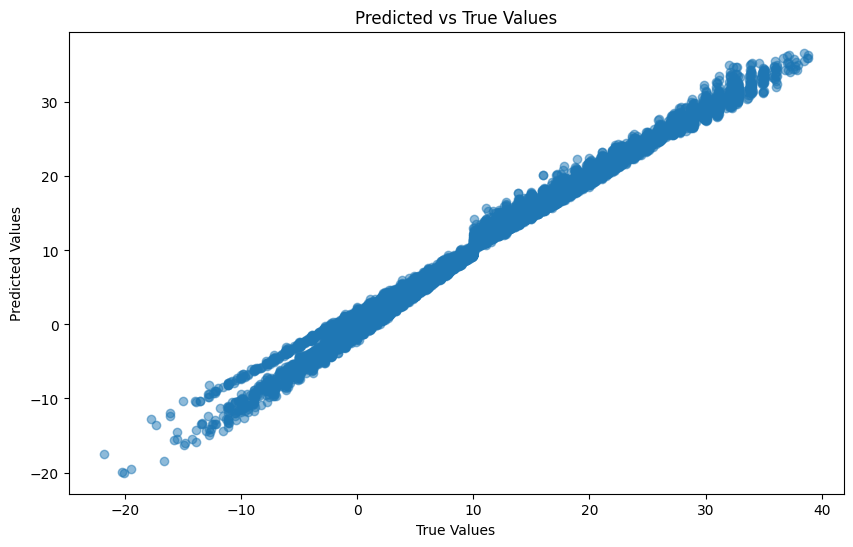

In [10]:
#Ans:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  #alpha=0.5 = transparency 50%, so that overlapping points are more clear
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs True Values')
plt.show()
